MOHAMMED IFTEKHAR ||
20-41980-1 ||
Computer Vision and Pattern Recognization (Sec-B)

In [1]:
import os
import cv2
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

Loading CIFAR10 Dataset

In [2]:
TRAIN_DIR = "C:/PROGRAMMING/CVPR/CIFAR10/train"
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({'image': img_arr, 'class': class_num})
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:08<00:00, 584.24it/s]

50000


Overview of random images from the dataset

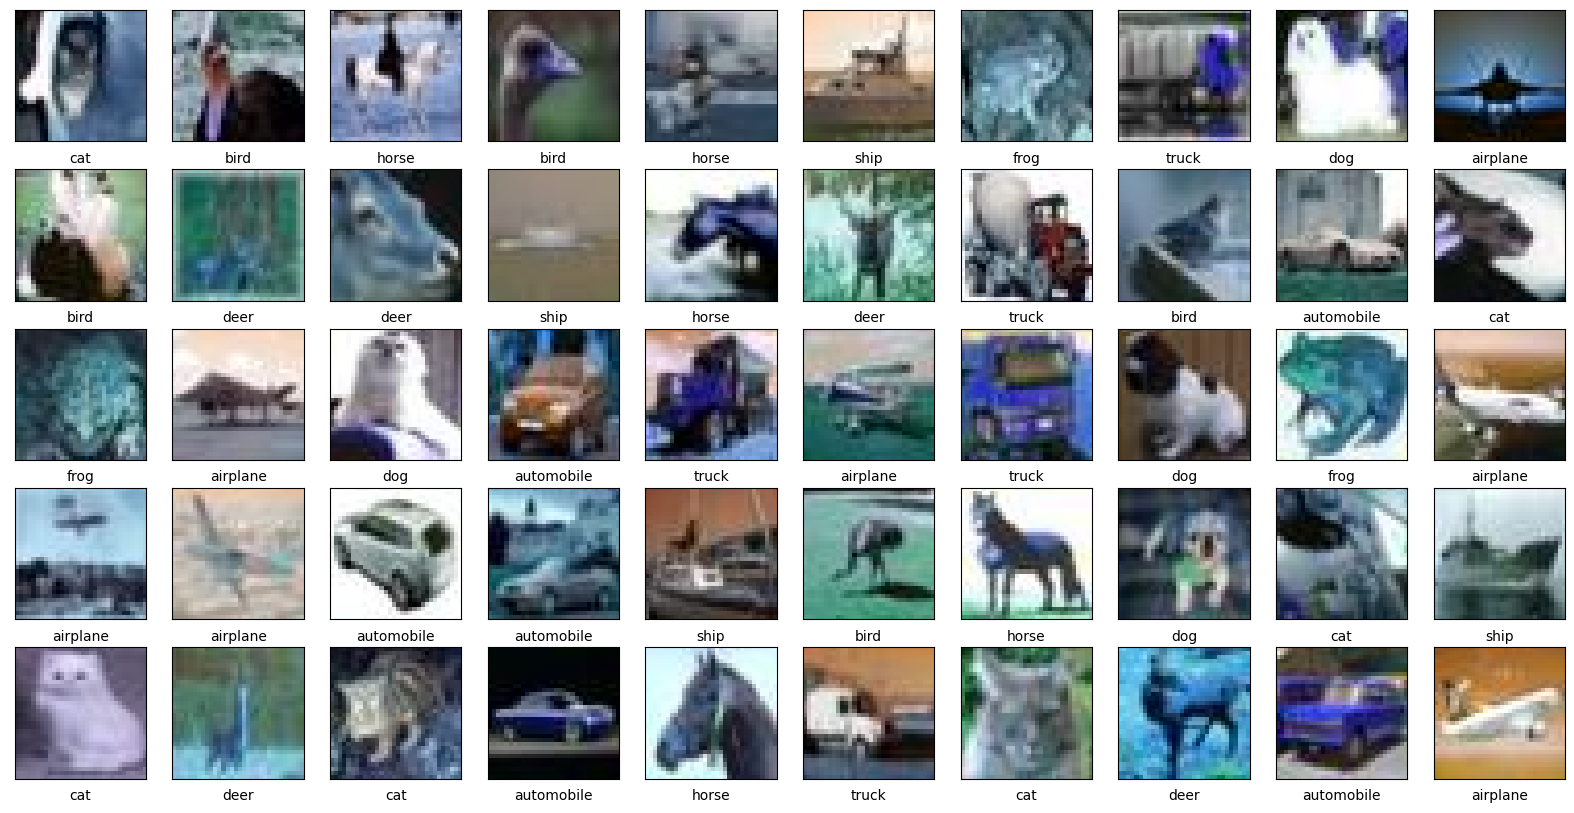

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

# KNN
=> The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

=> K = number of neighbors
=> X = features
=> Y = targets
=> a = prediction

In [6]:
class KNN:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion

In [7]:
def split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_acc = {}
l2_acc = {}

k_neighbors = np.arange(1, 20)

for k in tqdm(k_neighbors):
    knn = KNN(k)
    
    X_train , X_test, y_train, y_test = split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_acc[k] = knn.accuracy(y_test, y_pred_l1)
    l2_acc[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"When k = {k} accuracy of l1 is {l1_acc[k]} and accuracy of l2 is {l2_acc[k]}")


  5%|▌         | 1/19 [04:00<1:12:14, 240.78s/it]

When k = 1 accuracy of l1 is 0.189 and accuracy of l2 is 0.175


 11%|█         | 2/19 [08:31<1:13:08, 258.15s/it]

When k = 2 accuracy of l1 is 0.199 and accuracy of l2 is 0.169


 16%|█▌        | 3/19 [11:15<57:27, 215.49s/it]  

When k = 3 accuracy of l1 is 0.181 and accuracy of l2 is 0.165


 21%|██        | 4/19 [13:55<48:20, 193.36s/it]

When k = 4 accuracy of l1 is 0.207 and accuracy of l2 is 0.173


 26%|██▋       | 5/19 [16:40<42:43, 183.13s/it]

When k = 5 accuracy of l1 is 0.215 and accuracy of l2 is 0.178


 32%|███▏      | 6/19 [19:21<38:03, 175.69s/it]

When k = 6 accuracy of l1 is 0.217 and accuracy of l2 is 0.183


 37%|███▋      | 7/19 [22:00<34:02, 170.21s/it]

When k = 7 accuracy of l1 is 0.213 and accuracy of l2 is 0.181


 42%|████▏     | 8/19 [24:44<30:50, 168.27s/it]

When k = 8 accuracy of l1 is 0.218 and accuracy of l2 is 0.185


 47%|████▋     | 9/19 [27:25<27:39, 165.98s/it]

When k = 9 accuracy of l1 is 0.217 and accuracy of l2 is 0.181


 53%|█████▎    | 10/19 [30:05<24:38, 164.23s/it]

When k = 10 accuracy of l1 is 0.221 and accuracy of l2 is 0.197


 58%|█████▊    | 11/19 [32:49<21:51, 163.96s/it]

When k = 11 accuracy of l1 is 0.231 and accuracy of l2 is 0.197


 63%|██████▎   | 12/19 [35:30<19:02, 163.22s/it]

When k = 12 accuracy of l1 is 0.229 and accuracy of l2 is 0.194


 68%|██████▊   | 13/19 [38:11<16:15, 162.52s/it]

When k = 13 accuracy of l1 is 0.227 and accuracy of l2 is 0.205


 74%|███████▎  | 14/19 [40:55<13:34, 162.83s/it]

When k = 14 accuracy of l1 is 0.226 and accuracy of l2 is 0.211


 79%|███████▉  | 15/19 [43:35<10:48, 162.08s/it]

When k = 15 accuracy of l1 is 0.22 and accuracy of l2 is 0.214


 84%|████████▍ | 16/19 [46:16<08:05, 161.83s/it]

When k = 16 accuracy of l1 is 0.224 and accuracy of l2 is 0.213


 89%|████████▉ | 17/19 [49:00<05:24, 162.32s/it]

When k = 17 accuracy of l1 is 0.221 and accuracy of l2 is 0.218


 95%|█████████▍| 18/19 [51:39<02:41, 161.48s/it]

When k = 18 accuracy of l1 is 0.221 and accuracy of l2 is 0.21


100%|██████████| 19/19 [54:25<00:00, 171.85s/it]

When k = 19 accuracy of l1 is 0.227 and accuracy of l2 is 0.214


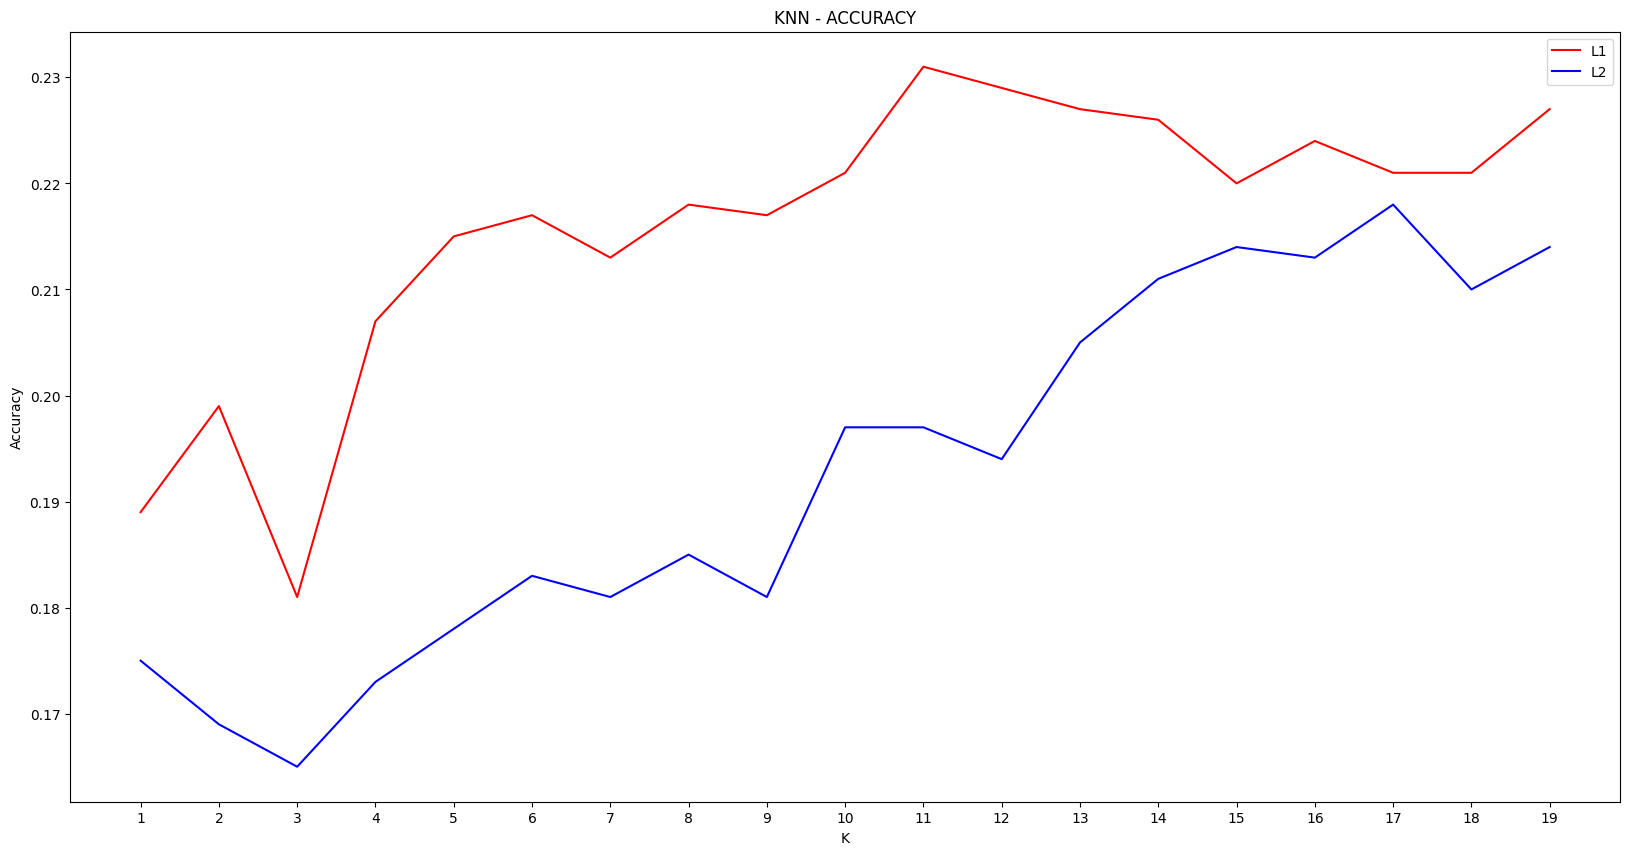

In [8]:
plt.figure(figsize=(20,10))
plt.title("KNN - ACCURACY")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_acc.values()), label="L1", color="red")
plt.plot(k_neighbors, list(l2_acc.values()), label="L2", color="blue")
plt.xticks(k_neighbors)
plt.legend(["L1", "L2"])
plt.show()

In [9]:
def best_accuracy(acc):
    best_k = max(acc, key=acc.get)
    best_accuracy = acc[best_k]
    return best_k, best_accuracy

best_k_l1, best_accuracy_l1 = best_accuracy(l1_acc)
best_k_l2, best_accuracy_l2 = best_accuracy(l2_acc)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {best_accuracy_l1}")

Best K for L1 Distance is 11 with accuracy 0.231
